In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/immigration-madrid-2021/Immigration_Madrid_2021.csv


In [2]:
!pip install flaml
import matplotlib.pyplot as plt
import pathlib, os, random
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.layers import BatchNormalization, Dense, Dropout
from sklearn.model_selection import train_test_split
from flaml import AutoML
from category_encoders import OneHotEncoder

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.5/157.5 MB 7.0 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.6.1
    Uninstalling xgboost-1.6.1:
      Successfully uninstalled xgboost-1.6.1


In [3]:
df = pd.read_csv('/kaggle/input/immigration-madrid-2021/Immigration_Madrid_2021.csv', index_col=0)
df

,Gender,Age,Studies,Nationality,Administrative_situation,Working
0,Women,51-65,College,España,Community,No
1,Women,51-65,College,Venezuela,ART,No
2,Women,18-30,Pre-college,Honduras,Refugee,No
3,Women,18-30,Pre-college,Venezuela,Community,No
4,Women,18-30,Pre-college,República Dominicana,Community_familiar,No
...,...,...,...,...,...,...
1803,Women,18-30,Elementary_school,España,Community,No
1804,Women,18-30,Elementary_school,España,Community,No
1805,Women,18-30,Elementary_school,Marruecos,Community,No
1806,Women,18-30,Elementary_school,Marruecos,Community,No


In [4]:
df.dropna()

,Gender,Age,Studies,Nationality,Administrative_situation,Working
0,Women,51-65,College,España,Community,No
1,Women,51-65,College,Venezuela,ART,No
2,Women,18-30,Pre-college,Honduras,Refugee,No
3,Women,18-30,Pre-college,Venezuela,Community,No
4,Women,18-30,Pre-college,República Dominicana,Community_familiar,No
...,...,...,...,...,...,...
1803,Women,18-30,Elementary_school,España,Community,No
1804,Women,18-30,Elementary_school,España,Community,No
1805,Women,18-30,Elementary_school,Marruecos,Community,No
1806,Women,18-30,Elementary_school,Marruecos,Community,No


In [5]:
df.Working.unique()

array(['No', 'Yes'], dtype=object)

In [6]:
for i in range(1523):
    if df.iloc[i, -1] == 'Yes':
        df.iloc[i, -1] = 1
    else:
        df.iloc[i, -1] = 0

In [7]:
df

,Gender,Age,Studies,Nationality,Administrative_situation,Working
0,Women,51-65,College,España,Community,0
1,Women,51-65,College,Venezuela,ART,0
2,Women,18-30,Pre-college,Honduras,Refugee,0
3,Women,18-30,Pre-college,Venezuela,Community,0
4,Women,18-30,Pre-college,República Dominicana,Community_familiar,0
...,...,...,...,...,...,...
1803,Women,18-30,Elementary_school,España,Community,0
1804,Women,18-30,Elementary_school,España,Community,0
1805,Women,18-30,Elementary_school,Marruecos,Community,0
1806,Women,18-30,Elementary_school,Marruecos,Community,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1523 entries, 0 to 1807
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Gender                    1523 non-null   object
 1   Age                       1523 non-null   object
 2   Studies                   1523 non-null   object
 3   Nationality               1523 non-null   object
 4   Administrative_situation  1523 non-null   object
 5   Working                   1523 non-null   object
dtypes: object(6)
memory usage: 83.3+ KB


In [9]:
X = df.loc[:, ['Gender','Age', 'Studies', 'Administrative_situation']]
X = OneHotEncoder(cols=['Gender','Age', 'Studies', 'Administrative_situation']).fit_transform(X)

In [10]:
X = np.array(X)
y = np.asarray(df.iloc[:, -1]).astype('int64')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


model = AutoML()

model.fit(X_train, y_train, task='classification', time_budget=20, metric='accuracy')

[flaml.automl: 05-27 02:31:51] {2365} INFO - task = classification
[flaml.automl: 05-27 02:31:51] {2367} INFO - Data split method: stratified
[flaml.automl: 05-27 02:31:51] {2371} INFO - Evaluation method: cv
[flaml.automl: 05-27 02:31:51] {2448} INFO - Minimizing error metric: 1-accuracy
[flaml.automl: 05-27 02:31:51] {2561} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 05-27 02:31:51] {2853} INFO - iteration 0, current learner lgbm
[flaml.automl: 05-27 02:31:52] {2984} INFO - Estimated sufficient time budget=6230s. Estimated necessary time budget=153s.
[flaml.automl: 05-27 02:31:52] {3036} INFO -  at 0.8s,	estimator lgbm's best error=0.0674,	best estimator lgbm's best error=0.0674
[flaml.automl: 05-27 02:31:52] {2853} INFO - iteration 1, current learner lgbm
[flaml.automl: 05-27 02:31:52] {3036} INFO -  at 0.9s,	estimator lgbm's best error=0.0674,	best estimator lgbm's best error=0.0674
[flaml.au

In [12]:
print('Best ML Model:', model.best_estimator)
print('Best hyperparmeter config:', model.best_config)
print('Best Accuracy on validation data: %f'%(1 - model.best_loss))
print('Training duration of best run: %f s'%(model.best_config_train_time))

Best ML Model: lgbm
Best hyperparmeter config: {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}
Best Accuracy on validation data: 0.932579
Training duration of best run: 0.005407 s


In [13]:
class BaseLineModel(tf.keras.Model):
    def __init__(self):
        super(BaseLineModel, self).__init__()
        self.D1 = Dense(64, activation='relu')
        self.D2 = Dense(64, activation='relu')
        self.D3 = Dense(64, activation='relu')
        self.D4 = Dense(64, activation='relu')
        self.D5 = Dense(64, activation='relu')
        self.D6 = Dense(64, activation='relu')
        self.D7 = Dense(2, activation='sigmoid')
        
    def call(self, x):
        x = self.D1(x)
        x = self.D2(x)
        x = self.D3(x)
        x = self.D4(x)
        x = self.D5(x)
        x = self.D6(x)
        y = self.D7(x)
        return y
    
TFmodel = BaseLineModel()

TFmodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['sparse_categorical_accuracy'])

history = TFmodel.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

TFmodel.summary()

2022-05-27 02:32:12.028780: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.
2022-05-27 02:32:12.174497: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


/opt/conda/lib/python3.7/site-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


36/36 [==============================] - 1s 10ms/step - loss: 155.7603 - sparse_categorical_accuracy: 0.9273 - val_loss: 0.2704 - val_sparse_categorical_accuracy: 0.9239
Epoch 2/50
36/36 [==============================] - 0s 3ms/step - loss: 0.3343 - sparse_categorical_accuracy: 0.9317 - val_loss: 0.2823 - val_sparse_categorical_accuracy: 0.9239
Epoch 3/50
36/36 [==============================] - 0s 3ms/step - loss: 0.3207 - sparse_categorical_accuracy: 0.9317 - val_loss: 0.2765 - val_sparse_categorical_accuracy: 0.9239
Epoch 4/50
36/36 [==============================] - 0s 3ms/step - loss: 0.2612 - sparse_categorical_accuracy: 0.9326 - val_loss: 0.2824 - val_sparse_categorical_accuracy: 0.9239
Epoch 5/50
36/36 [==============================] - 0s 3ms/step - loss: 0.2588 - sparse_categorical_accuracy: 0.9326 - val_loss: 0.2752 - val_sparse_categorical_accuracy: 0.9239
Epoch 6/50
36/36 [==============================] - 0s 3ms/step - loss: 0.2721 - sparse_categorical_accuracy: 0.9326 -

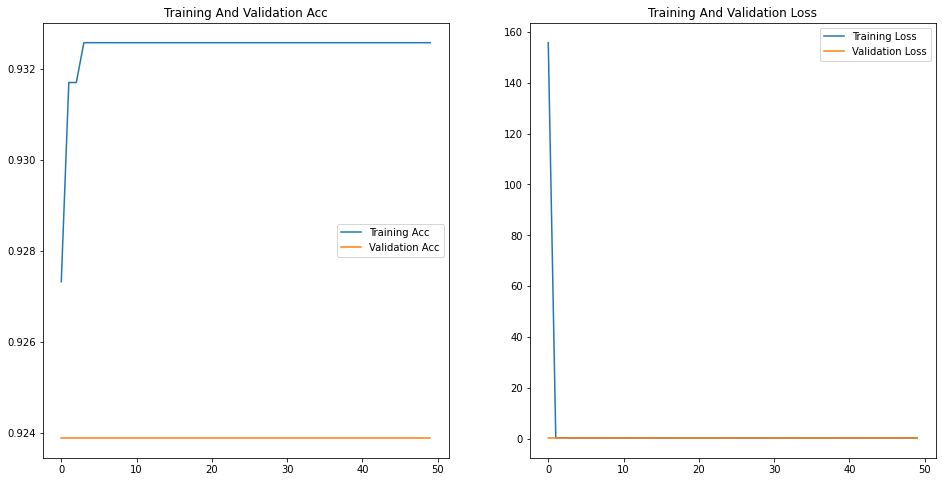

In [14]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Acc')
plt.plot(val_acc, label='Validation Acc')
plt.title('Training And Validation Acc')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training And Validation Loss')
plt.legend()

plt.show()

In [15]:
predForTFmodel = tf.argmax(TFmodel.predict(X_test), axis=1)
predForTFmodel

<tf.Tensor: shape=(381,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
     

In [16]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,